## Data Analysis and Cleaning on Culture Dataset

The <span style="color:#1E90FF; font-weight:bold;">Culture Data Analysis Project</span> is a Python code designed to clean and analyze cultural data efficiently. It leverages file handling to read data from `Culture.xlsx` and incorporates robust exception handling to manage errors gracefully. 

### Key Features:
- **Read Data:** Load data from an Excel file into a Pandas DataFrame.
- **Convert Age:** Transform age strings (e.g., "2 Years", "18 Months") into numeric years.
- **Convert Hours:** Convert time strings (e.g., "3 DAYS", "24 Hours") into total hours.
- **Handle Missing Values:** Identify and impute missing values in the `INTENSITY` column using the mode.
- **Outlier Detection:** Detect and visualize outliers in the `AGE` and `HOURS` columns using Z-score and IQR methods.
- **Outlier Removal:** Remove identified outliers and provide cleaned data for further analysis.
- **Visualizations:** Use Violin Plots to visualize the distribution of `AGE` and `HOURS` before and after outlier removal.
- **Summary Statistics:** Display summary statistics of the cleaned data.

Missing values before imputation:
AGE                        0
CPT_NAME                   0
BIRTH_DATE                 0
HOURS                      0
ORGAN_CLASSIFICATION       0
REPORT_DATE                0
MCROA_SENSITIVE            0
SPECIMEN_NAME              0
ANTIBIOTIC                 0
ORGANISM                   0
INTENSITY               3381
dtype: int64

Missing values after imputation:
AGE                     0
CPT_NAME                0
BIRTH_DATE              0
HOURS                   0
ORGAN_CLASSIFICATION    0
REPORT_DATE             0
MCROA_SENSITIVE         0
SPECIMEN_NAME           0
ANTIBIOTIC              0
ORGANISM                0
INTENSITY               0
dtype: int64


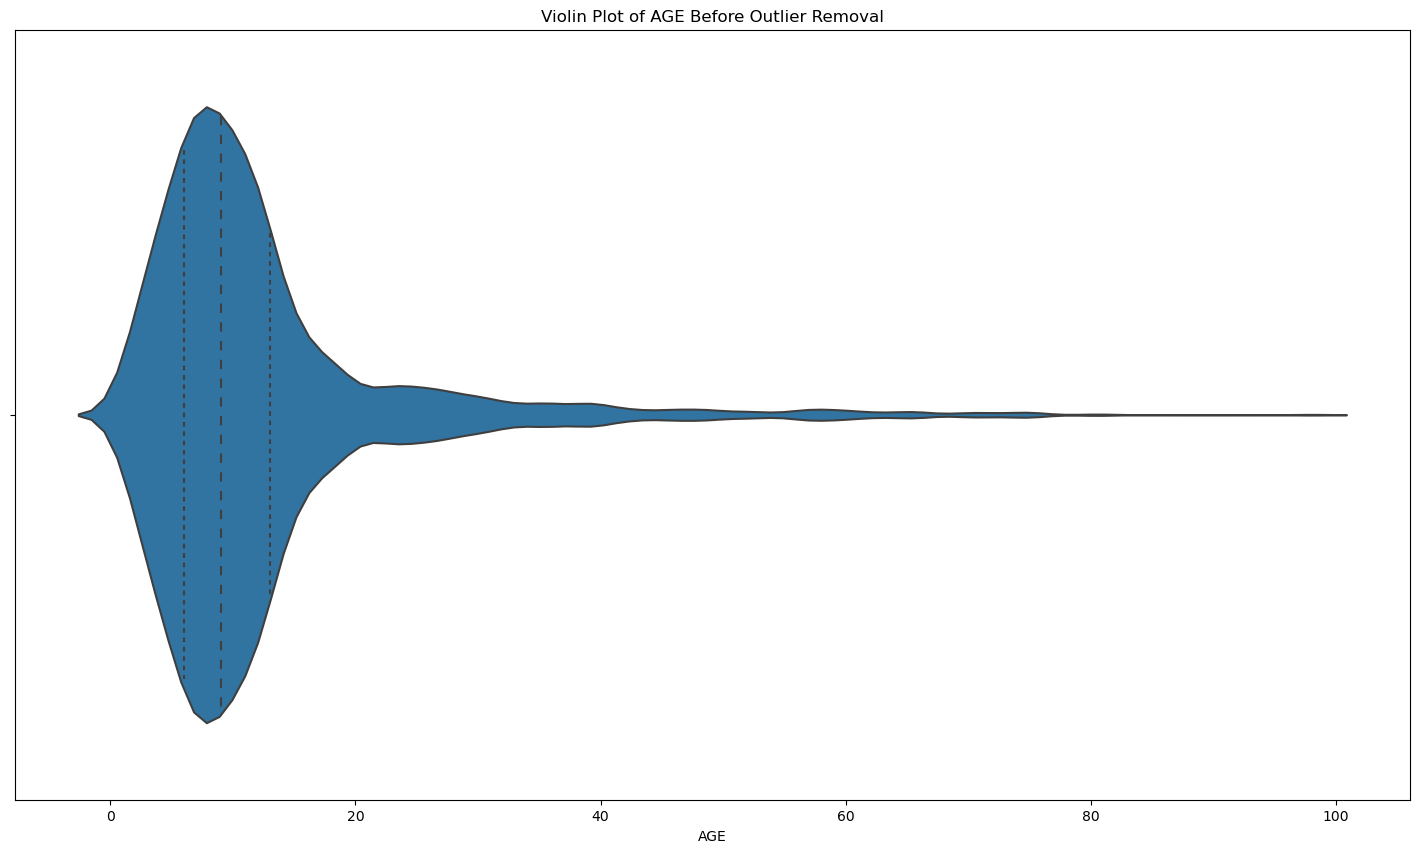

Outliers in AGE column (Z-score method):
16832    46.0
16833    46.0
16834    46.0
16835    46.0
16836    46.0
         ... 
28273    98.0
28274    98.0
28275    98.0
28276    98.0
28277    98.0
Name: AGE, Length: 801, dtype: float64

Outliers in AGE column (IQR method):
11999    24.0
12000    24.0
12001    24.0
12002    24.0
12003    24.0
         ... 
28273    98.0
28274    98.0
28275    98.0
28276    98.0
28277    98.0
Name: AGE, Length: 3063, dtype: float64


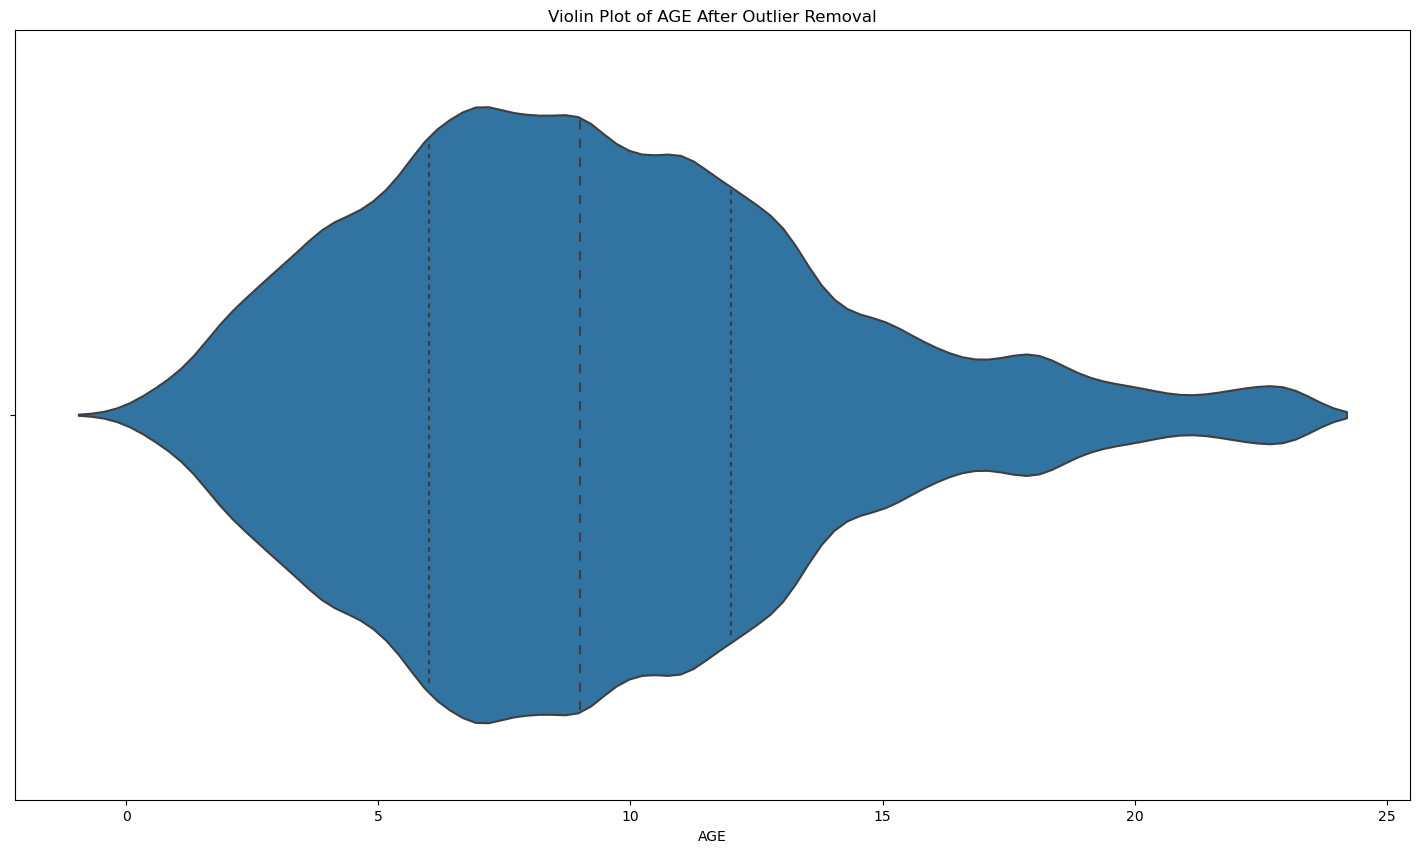

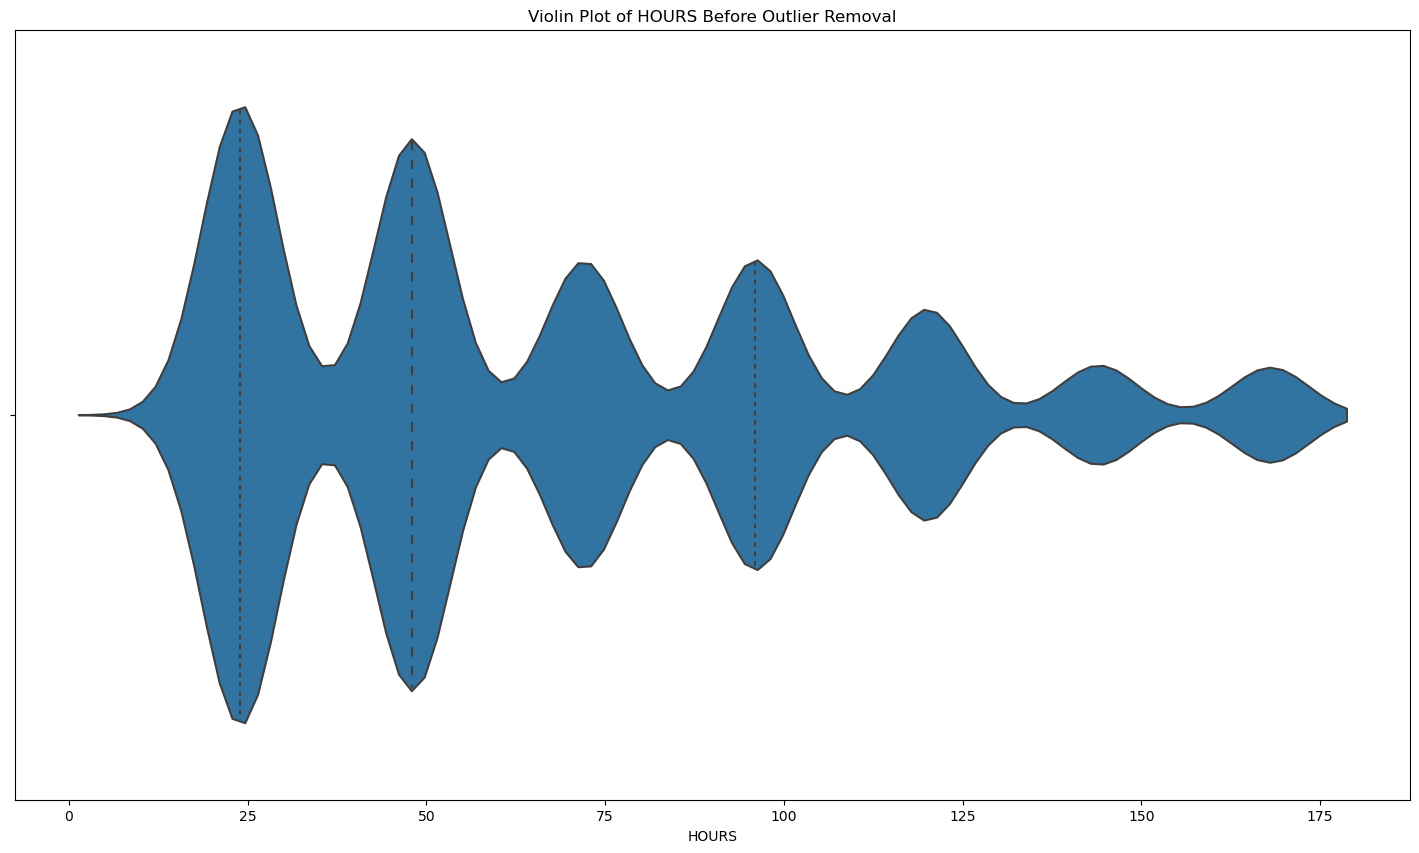


Outliers in HOURS column (Z-score method):
Series([], Name: HOURS, dtype: int64)

Outliers in HOURS column (IQR method):
Series([], Name: HOURS, dtype: int64)


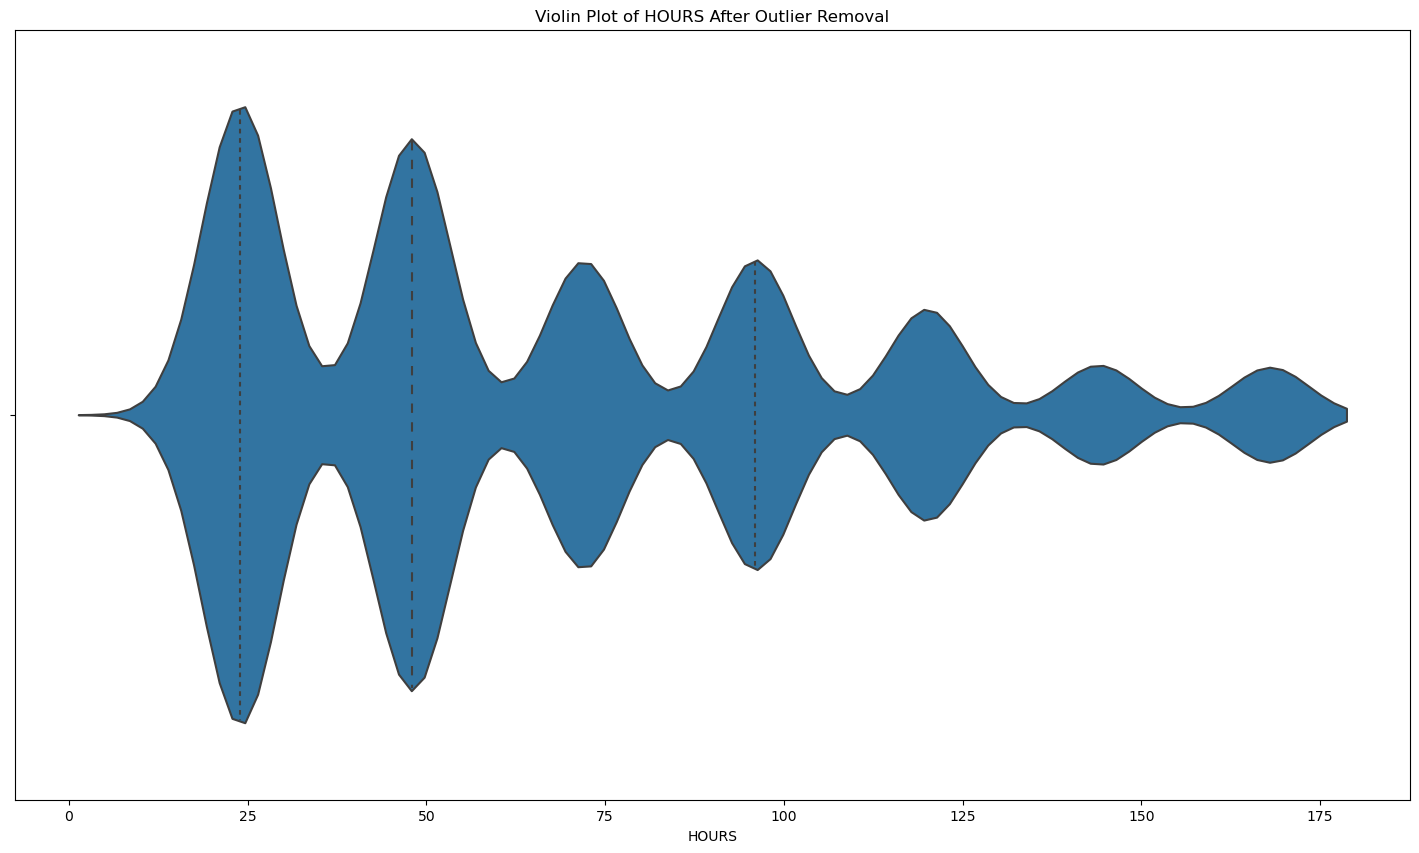


Summary after Outlier Removal in AGE column:
                AGE                     BIRTH_DATE         HOURS  \
count  25215.000000                          25215  25215.000000   
mean       9.295308  2014-03-08 23:51:08.887566848     67.522665   
min        0.250000            2000-01-12 00:00:00     18.000000   
25%        6.000000            2011-07-13 00:00:00     24.000000   
50%        9.000000            2014-08-11 00:00:00     48.000000   
75%       12.000000            2017-06-13 00:00:00     96.000000   
max       23.000000            2023-08-06 00:00:00    168.000000   
std        4.562840                            NaN     41.586614   

                         REPORT_DATE  
count                          25215  
mean   2022-12-03 19:47:24.743485952  
min              2022-01-12 12:02:18  
25%              2022-07-09 10:21:13  
50%              2022-10-01 11:17:08  
75%              2023-06-05 11:59:01  
max              2023-09-30 12:20:06  
std                          

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, f_oneway, kruskal

file_path = r'E:\Data Analysis\Culture.xlsx'
df = pd.read_excel(file_path)

#### Function to convert age strings to numeric years #####
def convert_age(age_string):
    try:
        # Extract numeric part (age) and handle special cases like months and years
        if 'Year' in age_string:
            age = int(age_string.split()[0])  # Extract numeric part
        elif 'Month' in age_string:
            age = round(int(age_string.split()[0]) / 12, 2)  # Convert months to years
        else:
            age = None  # Handle other cases (if any)
        return age
    except:
        return None

# Apply the function to the AGE column
df['AGE'] = df['AGE'].apply(convert_age)

##### convert days to hours ########
def parse_hours(hours_str):
    if isinstance(hours_str, str):
        if 'DAYS' in hours_str:
            return int(hours_str.split()[0]) * 24  # Convert days to hours
        elif 'Hours' in hours_str:
            return int(hours_str.split()[0])
        else:
            return None  # Handle other formats as needed
    else:
        return hours_str  # Return the input directly if it's not a string

# Apply the function to HOURS column
df['HOURS'] = df['HOURS'].apply(parse_hours)

####### Check missing values before imputation#######
print("Missing values before imputation:")
print(df.isnull().sum())

# Calculate the mode of INTENSITY column
mode_intensity = df['INTENSITY'].mode()[0]

# Impute missing values in INTENSITY column with the mode
df['INTENSITY'] = df['INTENSITY'].fillna(mode_intensity)

# Check missing values after imputation
print("\nMissing values after imputation:")
print(df.isnull().sum())

#######check outliers and remove it ########
# Step 1: Checking Outliers in AGE Column

# Visual Inspection using Violin Plot before Outlier Removal
plt.figure(figsize=(18, 10))
sns.violinplot(x=df['AGE'], inner='quartile')
plt.title('Violin Plot of AGE Before Outlier Removal')
plt.show()

# Numerical Methods for Outlier Detection

# Z-score Method for AGE Column
z_scores_age = zscore(df['AGE'])
outliers_age_zscore = (abs(z_scores_age) > 3)
print("Outliers in AGE column (Z-score method):")
print(df[outliers_age_zscore]['AGE'])

# IQR Method for AGE Column
Q1_age = df['AGE'].quantile(0.25)
Q3_age = df['AGE'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

outliers_age_iqr = (df['AGE'] < lower_bound_age) | (df['AGE'] > upper_bound_age)
print("\nOutliers in AGE column (IQR method):")
print(df[outliers_age_iqr]['AGE'])

# Removing Outliers from AGE Column
df_cleaned_age = df[~outliers_age_iqr]

# Visual Inspection using Violin Plot after Outlier Removal
plt.figure(figsize=(18, 10))
sns.violinplot(x=df_cleaned_age['AGE'], inner='quartile')
plt.title('Violin Plot of AGE After Outlier Removal')
plt.show()

# Step 2: Checking Outliers in HOURS Column

# Visual Inspection using Violin Plot before Outlier Removal
plt.figure(figsize=(18, 10))
sns.violinplot(x=df['HOURS'], inner='quartile')
plt.title('Violin Plot of HOURS Before Outlier Removal')
plt.show()

# Numerical Methods for Outlier Detection

# Z-score Method for HOURS Column
z_scores_hours = zscore(df['HOURS'])
outliers_hours_zscore = (abs(z_scores_hours) > 3)
print("\nOutliers in HOURS column (Z-score method):")
print(df[outliers_hours_zscore]['HOURS'])

# IQR Method for HOURS Column
Q1_hours = df['HOURS'].quantile(0.25)
Q3_hours = df['HOURS'].quantile(0.75)
IQR_hours = Q3_hours - Q1_hours
lower_bound_hours = Q1_hours - 1.5 * IQR_hours
upper_bound_hours = Q3_hours + 1.5 * IQR_hours

outliers_hours_iqr = (df['HOURS'] < lower_bound_hours) | (df['HOURS'] > upper_bound_hours)
print("\nOutliers in HOURS column (IQR method):")
print(df[outliers_hours_iqr]['HOURS'])

# Removing Outliers from HOURS Column
df_cleaned_hours = df[~outliers_hours_iqr]

# Visual Inspection using Violin Plot after Outlier Removal
plt.figure(figsize=(18, 10))
sns.violinplot(x=df_cleaned_hours['HOURS'], inner='quartile')
plt.title('Violin Plot of HOURS After Outlier Removal')
plt.show()

# Displaying cleaned DataFrame summaries
print("\nSummary after Outlier Removal in AGE column:")
print(df_cleaned_age.describe())

print("\nSummary after Outlier Removal in HOURS column:")
print(df_cleaned_hours.describe())
print(df)